In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

# Tạo thư mục để chứa hình ảnh và chú thích
!mkdir -p /content/coco/cocoapi
!mkdir -p /content/cocoapi
!unzip annotations_trainval2014.zip -d /content/coco/cocoapi

--2024-11-06 02:24:07--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.25.148, 3.5.27.74, 16.182.39.89, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.25.148|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  9.12MB/s    in 29s     

2024-11-06 02:24:36 (8.40 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]

Archive:  annotations_trainval2014.zip
  inflating: /content/coco/cocoapi/annotations/instances_train2014.json  
  inflating: /content/coco/cocoapi/annotations/instances_val2014.json  
  inflating: /content/coco/cocoapi/annotations/person_keypoints_train2014.json  
  inflating: /content/coco/cocoapi/annotations/person_keypoints_val2014.json  
  inflating: /content/coco/cocoapi/annotations/captions_tr

In [ ]:
!wget http://images.cocodataset.org/zips/train2014.zip
!unzip train2014.zip -d /content/coco/cocoapi/images/

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 extracting: /content/coco/cocoapi/images/train2014/COCO_train2014_000000408557.jpg  
 extracting: /content/coco/cocoapi/images/train2014/COCO_train2014_000000013714.jpg  
 extracting: /content/coco/cocoapi/images/train2014/COCO_train2014_000000194043.jpg  
 extracting: /content/coco/cocoapi/images/train2014/COCO_train2014_000000219859.jpg  
 extracting: /content/coco/cocoapi/images/train2014/COCO_train2014_000000278135.jpg  
 extracting: /content/coco/cocoapi/images/train2014/COCO_train2014_000000141015.jpg  
 extracting: /content/coco/cocoapi/images/train2014/COCO_train2014_000000280923.jpg  
 extracting: /content/coco/cocoapi/images/train2014/COCO_train2014_000000200024.jpg  
 extracting: /content/coco/cocoapi/images/train2014/COCO_train2014_000000435713.jpg  
 extracting: /content/coco/cocoapi/images/train2014/COCO_train2014_000000249993.jpg  
 extracting: /content/coco/cocoapi/images/train2014/COCO_train2014_000000424160.jpg

In [ ]:
import os
import sys
#sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/content/coco/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=7.85s)
creating index...
index created!
loading annotations into memory...
Done (t=0.45s)
creating index...
index created!


http://images.cocodataset.org/val2014/COCO_val2014_000000470623.jpg


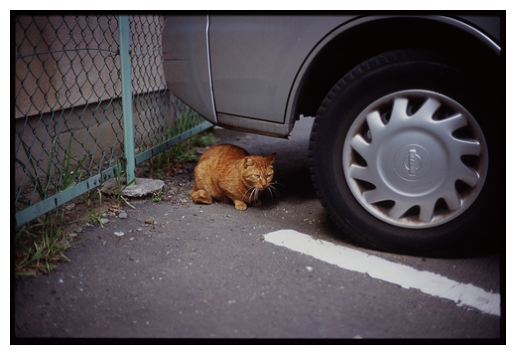

In [ ]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [ ]:
import sys
#sys.path.append('coco/cocoapi/PythonAPI')
from pycocotools.coco import COCO
!pip install nltk
import nltk
nltk.download('punkt')
from data_loader import get_loader
from torchvision import transforms

# Xác định một phép biến đổi để xử lý trước ảnh huấn luyện.
transform_train = transforms.Compose([
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Set the minimum word count threshold.
vocab_threshold = 5

# Specify the batch size.
batch_size = 10

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False,
                         cocoapi_loc='/content/coco')

A cat that is laying down underneath a car.
An orange cat sitting behind a silver vehicle.
A cat is sitting behind the tire of a truck.
a cat sits down under neath a car 
A cat sits underneath a vehicle in a parking lot.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


loading annotations into memory...
Done (t=1.43s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=0.65s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:46<00:00, 8981.92it/s]


In [ ]:
import numpy as np
import torch.utils.data as data

# Randomly sample a caption length, and sample indices with that length.
indices = data_loader.dataset.get_train_indices()
print('sampled indices:', indices)

# Create and assign a batch sampler to retrieve a batch with the sampled indices.
new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
data_loader.batch_sampler.sampler = new_sampler

# Obtain the batch.
images, captions = next(iter(data_loader))

print('images.shape:', images.shape)
print('captions.shape:', captions.shape)

sampled indices: [195909, 236982, 279154, 151978, 361323, 372732, 408003, 79817, 10175, 106058]
images.shape: torch.Size([10, 3, 224, 224])
captions.shape: torch.Size([10, 14])


In [ ]:
%load_ext autoreload
%autoreload 2
import torch

# Import EncoderCNN and DecoderRNN.
from model import EncoderCNN, DecoderRNN
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Specify the dimensionality of the image embedding.
embed_size = 256

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Initialize the encoder. (Optional: Add additional arguments if necessary.)
encoder = EncoderCNN(embed_size)

# Move the encoder to GPU if CUDA is available.
encoder.to(device)

# Move last batch of images (from Step 2) to GPU if CUDA is available.
images = images.to(device)

# Pass the images through the encoder.
features = encoder(images)

print('type(features):', type(features))
print('features.shape:', features.shape)

# Check that your encoder satisfies some requirements of the project! :D
assert type(features)==torch.Tensor, "Encoder output needs to be a PyTorch Tensor."
assert (features.shape[0]==batch_size) & (features.shape[1]==embed_size), "The shape of the encoder output is incorrect."

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:02<00:00, 88.6MB/s]


type(features): <class 'torch.Tensor'>
features.shape: torch.Size([10, 256])


In [ ]:
# Specify the number of features in the hidden state of the RNN decoder.
hidden_size = 512

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Store the size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the decoder.
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move the decoder to GPU if CUDA is available.
decoder.to(device)

# Move last batch of captions (from Step 1) to GPU if CUDA is available
captions = captions.to(device)

# Pass the encoder output and captions through the decoder.
outputs = decoder(features, captions)

print('type(outputs):', type(outputs))
print('outputs.shape:', outputs.shape)

# Check that your decoder satisfies some requirements of the project! :D
assert type(outputs)==torch.Tensor, "Decoder output needs to be a PyTorch Tensor."
assert (outputs.shape[0]==batch_size) & (outputs.shape[1]==captions.shape[1]) & (outputs.shape[2]==vocab_size), "the shape of the decoder output is incorrect."

type(outputs): <class 'torch.Tensor'>
outputs.shape: torch.Size([10, 14, 8852])


In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from model import EncoderCNN, DecoderRNN
import math


## TODO #1: Select appropriate values for the Python variables below.
batch_size = 64       # batch size
vocab_threshold = 6        # minimum word count threshold
vocab_from_file = True    # if True, load existing vocab file
embed_size = 512           # dimensionality of image and word embeddings
hidden_size = 512          # number of features in hidden state of the RNN decoder
num_epochs = 10             # number of training epochs
save_every = 1             # determines frequency of saving model weights
print_every = 50          # determines window for printing average loss
log_file = 'training_log.txt'       # name of file with saved training loss and perplexity
#total_step = 6000
# (Optional) TODO #2: Amend the image transform below.
transform_train = transforms.Compose([
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Build data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file,
                         cocoapi_loc='/content/coco',
                         num_workers=4)

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder.
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move models to GPU if CUDA is available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function.
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

# TODO #3: Specify the learnable parameters of the model.
params = list(decoder.parameters()) + list(encoder.embed.parameters())

# TODO #4: Define the optimizer.
optimizer = torch.optim.Adam(params, lr=0.001, betas=(0.9,0.999), eps=1e-8)

# Set the total number of training steps per epoch.
# chuan thi la 6457 step nhưng mà như vậy thì quá lâu
total_step = math.ceil(len(data_loader.dataset.caption_lengths) / data_loader.batch_sampler.batch_size)

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.63s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:46<00:00, 8838.94it/s] 
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNe

In [ ]:
import torch.utils.data as data
import numpy as np
import os
import requests
import time

# Hàm lưu checkpoint
def save_checkpoint(epoch, step, decoder, encoder, optimizer, loss, checkpoint_path):
    checkpoint = {
        'epoch': epoch,
        'step': step,
        'decoder_state_dict': decoder.state_dict(),
        'encoder_state_dict': encoder.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, checkpoint_path)

# Hàm khôi phục checkpoint
def load_checkpoint(checkpoint_path, decoder, encoder, optimizer):
    if os.path.exists(checkpoint_path):
        try:
            checkpoint = torch.load(checkpoint_path)
            decoder.load_state_dict(checkpoint['decoder_state_dict'])
            encoder.load_state_dict(checkpoint['encoder_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            epoch = checkpoint['epoch']
            step = checkpoint['step']
            loss = checkpoint['loss']
            print(f"Checkpoint loaded: Epoch {epoch}, Step {step}, Loss {loss}")
            return epoch, step
        except EOFError:
            print("Checkpoint file is corrupted. Starting from scratch.")
            return 1, 0  # Bắt đầu từ epoch và step 0 nếu checkpoint bị lỗi
    else:
        print("No checkpoint found. Starting from scratch.")
        return 0, 0  # Bắt đầu từ epoch và step 0 nếu không có checkpoint

# Đường dẫn lưu checkpoint
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/ML/ML/checkpoint.pth'

# Mở file log huấn luyện.
f = open("training_log.txt", 'w')

# Khôi phục từ checkpoint (nếu có)
start_epoch, start_step = load_checkpoint(checkpoint_path, decoder, encoder, optimizer)
old_time = time.time()

# Huấn luyện
for epoch in range(start_epoch, num_epochs):
    # Đặt lại start_step về 0 ở mỗi epoch mới
    if epoch != start_epoch:
        start_step = 0  # Đảm bảo rằng bước bắt đầu quay về 0 ở các epoch tiếp theo

    for i_step in range(start_step + 1, total_step + 1):
        # Lấy batch dữ liệu
        indices = data_loader.dataset.get_train_indices()
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler

        images, captions = next(iter(data_loader))

        # Chuyển dữ liệu sang GPU nếu có
        images = images.to(device)
        captions = captions.to(device)

        # Reset gradient
        decoder.zero_grad()
        encoder.zero_grad()

        # Truyền qua mô hình CNN-RNN
        features = encoder(images)
        outputs = decoder(features, captions)

        # Tính toán loss
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))

        # Backpropagation
        loss.backward()

        # Cập nhật optimizer
        optimizer.step()

        # Thống kê huấn luyện
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), np.exp(loss.item()))

        # In ra thống kê huấn luyện trên cùng một dòng
        print('\r' + stats, end="")
        sys.stdout.flush()

        # Ghi thống kê vào file log
        f.write(stats + '\n')
        f.flush()

        # In ra màn hình mỗi khi đạt đến bước cần in.
        if i_step % print_every == 0:
            print('\r' + stats)

        # Lưu checkpoint sau mỗi bước hoặc mỗi vài bước (tần suất có thể điều chỉnh).
        if i_step % print_every == 0:
            save_checkpoint(epoch, i_step, decoder, encoder, optimizer, loss.item(), checkpoint_path)

    # Lưu trọng số sau mỗi số epoch nhất định.
    if epoch % save_every == 0:
        torch.save(decoder.state_dict(), os.path.join('/content/drive/MyDrive/Colab Notebooks/ML/ML', 'decoder-%d.pkl' % epoch))
        torch.save(encoder.state_dict(), os.path.join('/content/drive/MyDrive/Colab Notebooks/ML/ML', 'encoder-%d.pkl' % epoch))

# Đóng file log
f.close()


NameError: name 'decoder' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch.utils.data as data
import numpy as np
import os
import requests
import time

# Hàm lưu checkpoint
def save_checkpoint(epoch, step, decoder, encoder, optimizer, loss, checkpoint_path):
    checkpoint = {
        'epoch': epoch,
        'step': step,
        'decoder_state_dict': decoder.state_dict(),
        'encoder_state_dict': encoder.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, checkpoint_path)

# Hàm khôi phục checkpoint
def load_checkpoint(checkpoint_path, decoder, encoder, optimizer):
    if os.path.exists(checkpoint_path):
        try:
            checkpoint = torch.load(checkpoint_path)
            decoder.load_state_dict(checkpoint['decoder_state_dict'])
            encoder.load_state_dict(checkpoint['encoder_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            epoch = checkpoint['epoch']
            step = checkpoint['step']
            loss = checkpoint['loss']
            print(f"Checkpoint loaded: Epoch {epoch}, Step {step}, Loss {loss}")
            return epoch, step
        except EOFError:
            print("Checkpoint file is corrupted. Starting from scratch.")
            return 1, 0  # Bắt đầu từ epoch và step 0 nếu checkpoint bị lỗi
    else:
        print("No checkpoint found. Starting from scratch.")
        return 0, 0  # Bắt đầu từ epoch và step 0 nếu không có checkpoint

# Đường dẫn lưu checkpoint
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/ML/ML/checkpoint.pth'

# Mở file log huấn luyện.
f = open("training_log.txt", 'w')

# Tham số để chỉ định epoch (có thể thay đổi giá trị này)
specified_epoch = 6  # Đặt giá trị epoch mà bạn muốn huấn luyện từ đây

# Khôi phục từ checkpoint (nếu có)
start_epoch, start_step = load_checkpoint(checkpoint_path, decoder, encoder, optimizer)

# Nếu bạn đã chỉ định một epoch cụ thể, sử dụng nó thay vì giá trị từ checkpoint
if specified_epoch is not None:
    start_epoch = specified_epoch
    start_step = 0  # Bắt đầu từ step 0 cho epoch mới
old_time = time.time()

# Huấn luyện
for epoch in range(start_epoch, num_epochs + 1):
    # Đặt lại start_step về 0 nếu không phải epoch đang khôi phục
    if epoch == start_epoch:
        step = start_step  # Tiếp tục từ bước start_step của epoch hiện tại
    else:
        step = 0  # Đặt lại step về 0 cho các epoch mới

    for i_step in range(step + 1, total_step + 1):
        # Lấy batch dữ liệu
        indices = data_loader.dataset.get_train_indices()
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler

        images, captions = next(iter(data_loader))

        # Chuyển dữ liệu sang GPU nếu có
        images = images.to(device)
        captions = captions.to(device)

        # Reset gradient
        decoder.zero_grad()
        encoder.zero_grad()

        # Truyền qua mô hình CNN-RNN
        features = encoder(images)
        outputs = decoder(features, captions)

        # Tính toán loss
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))

        # Backpropagation
        loss.backward()

        # Cập nhật optimizer
        optimizer.step()

        # Thống kê huấn luyện
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), np.exp(loss.item()))

        # In ra thống kê huấn luyện trên cùng một dòng
        print('\r' + stats, end="")
        sys.stdout.flush()

        # Ghi thống kê vào file log
        f.write(stats + '\n')
        f.flush()

        # In ra màn hình
        if i_step % print_every == 0:
            print('\r' + stats)

        # Lưu checkpoint sau mỗi bước hoặc mỗi vài bước (tần suất có thể điều chỉnh).
        if i_step % print_every == 0:
            save_checkpoint(epoch, i_step, decoder, encoder, optimizer, loss.item(), checkpoint_path)

    if epoch % save_every == 0:
        torch.save(decoder.state_dict(), os.path.join('/content/drive/MyDrive/Colab Notebooks/ML', 'decoder-%d.pkl' % epoch))
        torch.save(encoder.state_dict(), os.path.join('/content/drive/MyDrive/Colab Notebooks/ML', 'encoder-%d.pkl' % epoch))

# Đóng file log
f.close()

In [ ]:
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))])


#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_test,
                         mode='test')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Watch for any changes in model.py, and re-load it automatically.
% load_ext autoreload
% autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file = 'encoder-12.pkl'
decoder_file = 'decoder-12.pkl'

#  TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

In [ ]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list"
assert all([type(x)==int for x in output]), "Output should be a list of integers."
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an intege

In [ ]:
# TODO #4: Complete the function.
def clean_sentence(output):
    sentence = ""
    for i in output:
        word = data_loader.dataset.vocab.idx2word[i]
        if(word == data_loader.dataset.vocab.start_word):
            continue
        elif(word == data_loader.dataset.vocab.end_word):
            break
        else:
            sentence = sentence + " " + word
    return sentence

In [ ]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

In [ ]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)
    sentence = clean_sentence(output)
    print(sentence)

In [ ]:
get_prediction()